In [1]:
using Unitful
cm = u"cm"
mm = u"mm"

4cm ÷ 5mm

8

In [2]:
4cm / 5mm

0.8 cm mm^-1

In [3]:
4cm / 5mm |> NoUnits

8.0

In [4]:
4cm / 5mm + 0

8.0

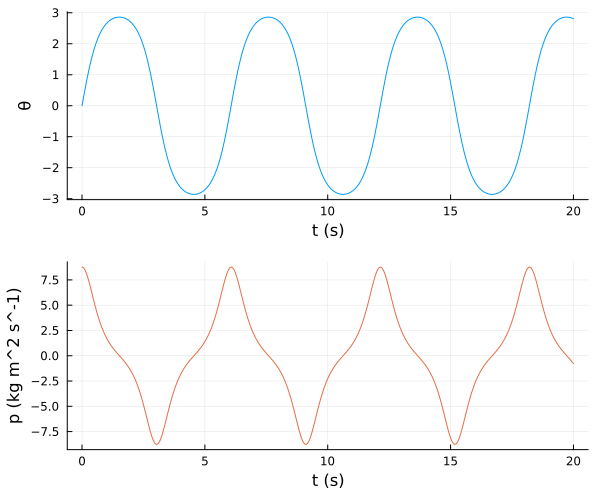

In [5]:
using Unitful
m, kg, s = u"m", u"kg", u"s"
using Plots
default(fmt=:png)

"""du/dt = F(u, v), dv/dt = G(u, v)"""
function symplectic_euler(G, F, v0, u0, tspan, param, dt)
    t = range(tspan...; step = dt)
    u = similar(t, typeof(u0))
    v = similar(t, typeof(v0))
    u[begin], v[begin] = u0, v0
    for i in eachindex(t)[begin:end-1]
        v[i+1] = v[i] + G(u[i], v[i], param)*dt
        u[i+1] = u[i] + F(u[i], v[i+1], param)*dt
    end
    t, u, v
end

F(θ, p, (; M, L)) = p/(M*L^2)
G(θ, p, (; M, L, g)) = -M*g*L*sin(θ)
param = (M = 0.5kg, L = 2.0m, g = 9.8m/s^2)
ymax = 0.99
θ0 = 0.0
p0 = ((; M, L, g) = param; M*L^2*√(g/L)*2ymax)
tspan = (0.0s, 20.0s)
dt = 0.01s

t, θ, p = symplectic_euler(G, F, p0, θ0, tspan, param, dt)

P1 = plot(t, θ; label="", xguide="t", yguide="θ", c=1)
P2 = plot(t, p; label="", xguide="t", yguide="p", c=2)
plot(P1, P2; size=(600, 500), layout=(2, 1))

In [6]:
Any[t θ p]

2001×3 Matrix{Any}:
   0.0 s  0.0          8.76583 kg m^2 s^-1
  0.01 s  0.0438292    8.76583 kg m^2 s^-1
  0.02 s  0.0876369    8.76154 kg m^2 s^-1
  0.03 s  0.131402     8.75296 kg m^2 s^-1
  0.04 s  0.175102     8.74012 kg m^2 s^-1
  0.05 s  0.218718     8.72305 kg m^2 s^-1
  0.06 s  0.262226     8.70179 kg m^2 s^-1
  0.07 s  0.305608     8.67638 kg m^2 s^-1
  0.08 s  0.348843      8.6469 kg m^2 s^-1
  0.09 s  0.39191       8.6134 kg m^2 s^-1
   0.1 s  0.43479      8.57597 kg m^2 s^-1
  0.11 s  0.477463     8.53469 kg m^2 s^-1
  0.12 s  0.519911     8.48965 kg m^2 s^-1
       ⋮             
 19.89 s  2.84017    -0.447583 kg m^2 s^-1
  19.9 s  2.83778    -0.476677 kg m^2 s^-1
 19.91 s  2.83525    -0.505995 kg m^2 s^-1
 19.92 s  2.83258    -0.535549 kg m^2 s^-1
 19.93 s  2.82975    -0.565353 kg m^2 s^-1
 19.94 s  2.82677     -0.59542 kg m^2 s^-1
 19.95 s  2.82364    -0.625766 kg m^2 s^-1
 19.96 s  2.82036    -0.656402 kg m^2 s^-1
 19.97 s  2.81692    -0.687344 kg m^2 s^-1
 19.98 s  2.

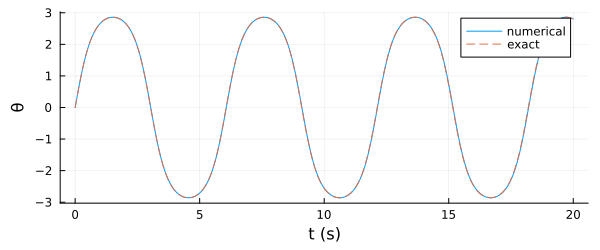

In [7]:
using Elliptic: Jacobi
sol_exact(t, (; L, g), ymax) = 2asin(ymax*Jacobi.sn(√(g/L)*t, ymax^2))

plot(t, θ; label="numerical", xguide="t", yguide="θ")
plot!(t, t -> sol_exact(t, param, ymax); label="exact", ls=:dash)
plot!(size=(600, 250), legend=:topright)
plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)